In [45]:
import pandas as pd 
import numpy as np 
data=pd.read_csv("ml_data.csv")

In [46]:
data.head()

,Unnamed: 0,Unnamed: 0.1,timestamp,reg,airline_name,model,model_text,country_origin,country_dest,flight_number,...,real_departure,real_arrival,status,duration,distance_travelled,hour_dep,weekday_dep,day_of_month_dep,arrival_delay,departure_delay
0,7,7,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E732,...,2017-03-01 06:31:37,2017-03-01 08:03:00,Landed 08:03,5524,1082.7558529029552 km,6,Wednesday,1,-22.0,6.0
1,8,8,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E6216,...,2017-02-28 20:56:07,2017-02-28 22:31:00,Landed 22:32,5787,1082.7558529029552 km,21,Tuesday,28,-24.0,-4.0
2,9,9,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E5156,...,2017-02-28 19:29:33,2017-02-28 20:13:00,Landed 20:13,2665,423.7601185098625 km,19,Tuesday,28,-17.0,9.0
3,10,10,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E174,...,2017-02-28 16:49:10,2017-02-28 18:23:00,Landed 18:23,5660,1134.6651511087132 km,16,Tuesday,28,-17.0,19.0
4,11,11,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E176,...,2017-02-28 11:22:52,2017-02-28 13:11:00,Landed 13:11,6517,1252.3895747521426 km,10,Tuesday,28,56.0,67.0


In [3]:
data.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'timestamp', u'reg', u'airline_name',
       u'model', u'model_text', u'country_origin', u'country_dest',
       u'flight_number', u'origin', u'destination', u'scheduled_departure',
       u'scheduled_arrival', u'estimated_departure', u'estimated_arrival',
       u'real_departure', u'real_arrival', u'status', u'duration',
       u'distance_travelled', u'hour_dep', u'weekday_dep', u'day_of_month_dep',
       u'arrival_delay', u'departure_delay'],
      dtype='object')

In [47]:
features=data[["airline_name","model","flight_number","origin","destination","hour_dep","day_of_month_dep","weekday_dep","reg"]]

In [76]:
features.head()

,airline_name,model,flight_number,origin,destination,hour_dep,day_of_month_dep,weekday_dep,reg
0,IndiGo,A320,6E732,Hyderabad Rajiv Gandhi International Airport,Lucknow Chaudhary Charan Singh Airport,6,1,Wednesday,VT-IAL
1,IndiGo,A320,6E6216,Lucknow Chaudhary Charan Singh Airport,Hyderabad Rajiv Gandhi International Airport,21,28,Tuesday,VT-IAL
2,IndiGo,A320,6E5156,Delhi Indira Gandhi International Airport,Lucknow Chaudhary Charan Singh Airport,19,28,Tuesday,VT-IAL
3,IndiGo,A320,6E174,Mumbai Chhatrapati Shivaji International Airport,Delhi Indira Gandhi International Airport,16,28,Tuesday,VT-IAL
4,IndiGo,A320,6E176,Trivandrum International Airport,Mumbai Chhatrapati Shivaji International Airport,10,28,Tuesday,VT-IAL


In [62]:
label=[]
for items in data['arrival_delay']:
    if items>60:
        label.append(1)
    else:
        label.append(0)

In [63]:
print(len(label))
print(features.shape)

91458
(91458, 9)


In [64]:
feature=pd.get_dummies(features,drop_first=True)
#labels = pd.get_dummies(,drop_first=True)
label=pd.Series(label)

In [65]:
feature.shape

(91458, 2825)

In [68]:
sum(label)

2222

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score,recall_score,precision_score

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(feature,label,test_size=0.3,random_state=20)

In [50]:
clf=DecisionTreeClassifier(min_samples_leaf=9)
clf.fit(X_train,Y_train)
print(2+2)

4


In [51]:
pred=clf.predict(X_test)
print(accuracy_score(pred,Y_test))


0.975763539617


In [52]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score
print(confusion_matrix(pred,Y_test))
print(recall_score(pred,Y_test))
print(precision_score(pred,Y_test))

[[26744   641]
 [   24    29]]
0.547169811321
0.0432835820896


In [99]:
final=pd.DataFrame([Y_test,pred])

In [91]:
final

,23010,19223,21413,587,84397,68546,32752,73799,51568,53059,...,761,35374,77165,49949,34789,60166,67483,50573,34557,63998
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
data.iloc[17648]

Unnamed: 0                                                     106076
Unnamed: 0.1                                                   106076
timestamp                                   2017-03-03 05:41:33+00:00
reg                                                            VT-WAK
airline_name                                                    GoAir
model                                                            A320
model_text                                            Airbus A320-214
country_origin                                                  India
country_dest                                                    India
flight_number                                                   G8262
origin                                  Kolkata International Airport
destination            Bhubaneswar Biju Patnaik International Airport
scheduled_departure                               2017-03-02 18:45:00
scheduled_arrival                                 2017-03-02 19:55:00
estimated_departure 

In [97]:
#from time import time 
start=time()
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
scorer = make_scorer(recall_score)
parameters={"min_samples_split":[2,3,5],"criterion":["entropy"]}
#clf_2=GridSearchCV(clf,parameter,recall_score)
clf_2 = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer,cv=3)

#clf_2.fit(X_train,Y_train)
print(time()-start)

0.00100016593933


## Hypertuning Decision Tree parameters

In [16]:
from sklearn.tree import export_graphviz

def visualize_tree(tree,feature_names):
    with open("dt.dot",'w') as f:
        export_graphviz(tree,out_file=f,feature_names=feature_names)
    command=["dot","-Tpng","dt.dot","-o","dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run graphviz")


In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
for k in [3,4]:
    recall_values=[]
    precision_values=[]
    accuracy_values=[]
    for value in list(range(1,12)):
        start_3=time()
        clf_3=DecisionTreeClassifier(criterion="gini",min_samples_leaf=value,min_samples_split=k,random_state=42)
        clf_3.fit(X_train,Y_train)
        pred_3=clf_3.predict(X_test)
        recall_values.append(recall_score(pred_3,Y_test))
        precision_values.append(precision_score(pred_3,Y_test))
        accuracy_values.append(accuracy_score(pred_3,Y_test))
        print(time()-start_3)
    plt.plot(list(range(1,12)),recall_values,label="k")
    plt.show()
    plt.plot(list(range(1,12)),accuracy_values,label="k")
    plt.show()
    plt.plot(list(range(1,12)),accuracy_values,label="k")
    plt.show()


In [92]:
from time import time
from sklearn.metrics import recall_score
recall_values=[]
precision_values=[]
accuracy_values=[]
for value in list(range(2,12)):
    start_3=time()
    
    clf_3=DecisionTreeClassifier(criterion="gini",min_samples_leaf=value,min_samples_split=2,random_state=42)
    clf_3.fit(X_train,Y_train)
    pred_3=clf_3.predict(X_test)
    recall_values.append(recall_score(pred_3,Y_test))
    precision_values.append(precision_score(pred_3,Y_test))
    accuracy_values.append(accuracy_score(pred_3,Y_test))
    print(time()-start_3)

74.6629998684
74.0050001144
65.8559999466
69.2369999886
70.2669999599
63.8910000324
57.9140000343
57.513999939
55.3150000572
53.6570000648


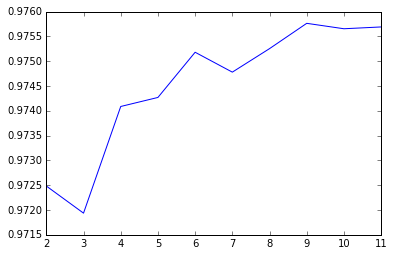

In [93]:
plt.plot(list(range(2,12)),accuracy_values)
plt.show()

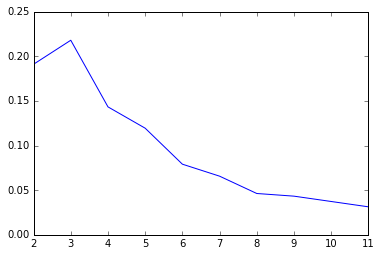

In [94]:
plt.plot(list(range(2,12)),precision_values)
plt.show()

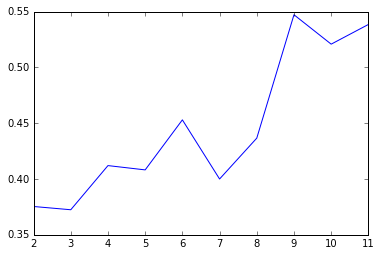

In [95]:
plt.plot(list(range(2,12)),recall_values)
plt.show()